#### 1850200-黄天洋-第六期周实验课-申优
# 实践课六
## 练习
#### 1.&emsp;根据如下数据，计算三次自然样条插值函数
$$x_i=-3,-1,0,3,4\qquad f(x_i)=7,11,26,56,29$$

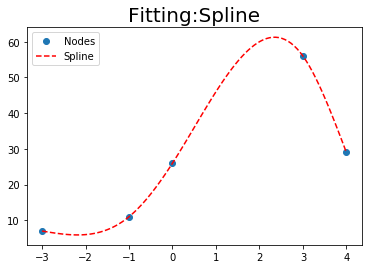

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import *

#节点及函数值
x=np.array([-3,-1,0,3,4])
y=np.array([7,11,26,56,29])

#三次自然样条插值
cs=CubicSpline(x,y,bc_type='natural')
xnew=np.linspace(np.amin(x),np.amax(x),100)
ynew=cs(xnew)

#绘图
plt.title('Fitting:Spline',size=20)
plt.plot(x,y,'o',label='Nodes')
plt.plot(xnew,ynew,'r--',label='Spline')
plt.legend()
plt.show()

#### 2.&emsp;根据如下数据，计算三次样条插值函数
$$x_i=0,1,2,3\qquad f(x_i)=0,0,0,0\qquad f'(0)=1\qquad f'(3)=0$$

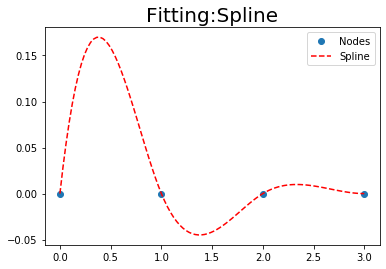

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import *

#节点及函数值
x=np.array([0,1,2,3])
y=np.array([0,0,0,0])

#三次样条插值
cs=CubicSpline(x,y,bc_type=((1,1),(1,0)))
xnew=np.linspace(np.amin(x),np.amax(x),100)
ynew=cs(xnew)

#绘图
plt.title('Fitting:Spline',size=20)
plt.plot(x,y,'o',label='Nodes')
plt.plot(xnew,ynew,'r--',label='Spline')
plt.legend()
plt.show()

#### 3.&emsp;根据如下数据，计算三次样条插值函数
$$x_i=0,1,2,3\qquad f(x_i)=1,2,3,10\qquad f''(0)=1\qquad f''(3)=0$$

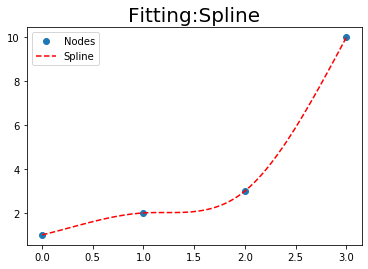

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import *

#节点及函数值
x=np.array([0,1,2,3])
y=np.array([1,2,3,10])

#三次样条插值
cs=CubicSpline(x,y,bc_type=((2,1),(2,0)))
xnew=np.linspace(np.amin(x),np.amax(x),100)
ynew=cs(xnew)

#绘图
plt.title('Fitting:Spline',size=20)
plt.plot(x,y,'o',label='Nodes')
plt.plot(xnew,ynew,'r--',label='Spline')
plt.legend()
plt.show()

#### 4.&emsp;根据如下数据，计算满足周期边界条件的三次样条插值函数
$$x_i=0,1,2,3\quad f(x_i)=1,2,3,10$$

此函数取值在diff=0时不满足周期边界条件，故将10改为1


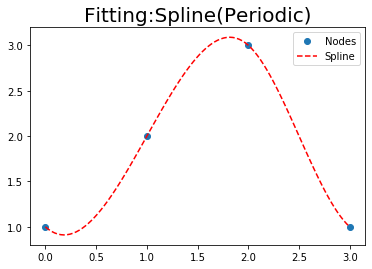

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import *

#节点及函数值
x=np.array([0,1,2,3])
y=np.array([1,2,3,1])
print('此函数取值在diff=0时不满足周期边界条件，故将10改为1')

#三次样条插值(周期边界条件)
cs=CubicSpline(x,y,bc_type='periodic')
xnew=np.linspace(np.amin(x),np.amax(x),100)
ynew=cs(xnew)

#绘图
plt.title('Fitting:Spline(Periodic)',size=20)
plt.plot(x,y,'o',label='Nodes')
plt.plot(xnew,ynew,'r--',label='Spline')
plt.legend()
plt.show()

## 作业：
#### **1.&emsp;分段多项式绘图**
实验目的：分段多项式绘图。<br/>
实验内容：在同一个图形窗口中画出如下函数的图形<br/>
1）$f_1(x)=
\begin{align}
\begin{cases}
2-x^2,\qquad &|x|\le 1\\
(x-2)^2,\qquad &1\le x\le 2\\
(x+2)^2,\qquad &-2\le x\le -1\\
0,\qquad &|x|\ge 2\\
\end{cases}
\end{align}$<br/>
<br/>
2）$f_2(x)=\dfrac{\sin x}{e^x+1}$

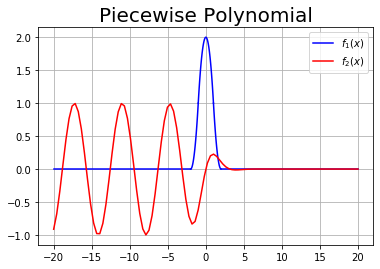

In [224]:
import numpy as np
import matplotlib.pyplot as plt

plt.title('Piecewise Polynomial',size=20)
#f1(x)-蓝色
x1=np.linspace(-1,1,100)
plt.plot(x1,2-x1**2,'b',label='$f_1(x)$')
x2=np.linspace(1,2,100)
plt.plot(x2,(x2-2)**2,'b')
x3=np.linspace(-2,-1,100)
plt.plot(x3,(x3+2)**2,'b')
x4=np.linspace(2,20,100)
plt.plot(x4,np.zeros(100),'b',-x4,np.zeros(100),'b')

#f2(x)-红色
y=np.linspace(-20,20,100)
plt.plot(y,np.sin(y)/(np.exp(y)+1),'r',label='$f_2(x)$')

plt.legend(loc='best')
plt.grid()
plt.show()

#### **2.&emsp;三次样条插值**
实验目的：三次样条插值。<br/>
实验内容：给定函数$f(x)=\dfrac{1}{1+25x^2},\quad -1\le x\le 1$，取等距节点，构造牛顿插值多项式$N_{10}(x)$和三次样条插值函数$S_{10}(x)$。分别将两种插值多项式与$f(x)$的曲线画在同一个坐标系上进行比较。

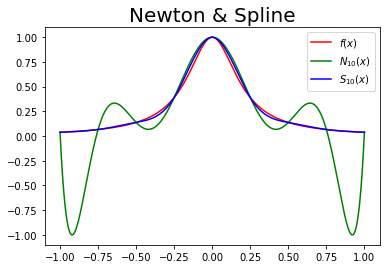

In [219]:
import numpy as np
import matplotlib.pyplot as plt

#牛顿差商函数及牛顿插值函数
def newton_diff(x,f):
    n=np.size(x)
    D=np.zeros((n,n+1))
    D[:,0]=x
    D[:,1]=f
    for i in range(n-1):
        for j in range(n-i-1):
            D[i+1+j,i+2]=(D[i+1+j,i+1]-D[i+j,i+1])/(D[i+j+1,0]-D[j,0])
    return(D)
def newton(x,f):
    n=np.size(x)
    D=newton_diff(x,f)
    N=D[0,1]
    p=1
    for i in range(n-1):
        p=np.polymul(p,np.poly1d([1,-D[i,0]]))
        N=np.polyadd(N,D[i+1,i+2]*p)
    return(N)    

#等距节点取值及拟合节点取值
x=np.linspace(-1,1,9)
xnew=np.linspace(-1,1,1000)
f=1/(1+25*x**2)
fnew=1/(1+25*xnew**2)

#牛顿插值
N=np.poly1d(newton(x,f))
fnew_N=N(xnew)

#三次样条插值
cs=CubicSpline(x,f,bc_type='natural')
fnew_S=cs(xnew)

#绘图
plt.title('Newton & Spline',size=20)
plt.plot(xnew,fnew,'r',label='$f(x)$')
plt.plot(xnew,fnew_N,'g',label='$N_{10}(x)$')
plt.plot(xnew,fnew_S,'b',label='$S_{10}(x)$')
plt.legend()
plt.show()

#### **3.&emsp;埃尔米特插值**
实验目的：埃尔米特插值<br/>
实验内容：已知$f(0)=1,f'(0)=2,f(1)=6,f'(1)=37$，求$3$次埃尔米特插值多项式$H_3(x)$在$x=0.75$处的值。

In [26]:
import numpy as np
from scipy.interpolate import *

#节点及函数值
x=np.array([0,0,1,1])
f=np.array([1,2,6,37])

#埃尔米特插值
H=KroghInterpolator(x,f)
print('H3(x)在x=0.75处的值为',H(0.75))

H3(x)在x=0.75处的值为 0.109375


# 实践课七
## 内容
#### 1.&emsp;求如下数据表的二次最小二乘拟合多项式

|$x_i$|0|0.25|0.50|0.75|1.00|
|:-:|:-:|:-:|:-:|:-:|:-:|
|$f(x_i)$|1.0000|1.2840|1.6487|2.1170|2.7183|

拟合多项式为：
         2
0.8437 x + 0.8642 x + 1.005


<function matplotlib.pyplot.show(*args, **kw)>

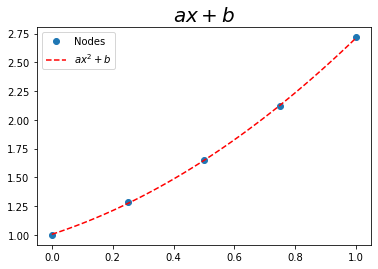

In [225]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import *

#节点及函数值
x=np.linspace(0,1,5)
xnew=np.linspace(np.amin(x),np.amax(x),100)
f=np.array([1,1.2840,1.6487,2.1170,2.7183])

#拟合函数-二次多项式
def func(x,a,b,c):
    return a*x**2+b*x+c

#最小二乘拟合
popt,pcov=curve_fit(func,x,f)
ffit=func(xnew,popt[0],popt[1],popt[2])
p=np.poly1d([popt[0],popt[1],popt[2]])
print('拟合多项式为：\n',p)

#绘图
plt.title('$ax+b$',size=20)
plt.plot(x,f,'o',label='Nodes')
plt.plot(xnew,ffit,'r--',label='$ax^2+b$')
plt.legend()
plt.show

#### 2.&emsp;给定如下数据，求最小二乘拟合函数

|$x_i$|0.24|0.65|0.95|1.24|1.73|2.01|2.23|2.52|2.77|2.99|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|$y_i$|0.23|-0.26|-1.10|-0.45|0.27|0.10|-0.29|0.24|0.56|1.00|

a的值为 0.18498022996505942 
b的值为 -0.24619328783401437 
c的值为 -0.25935597898620183 
d的值为 0.46828888082181735 
e的值为 4.628050297770784 
f的值为 -6.145125447671033


<function matplotlib.pyplot.show(*args, **kw)>

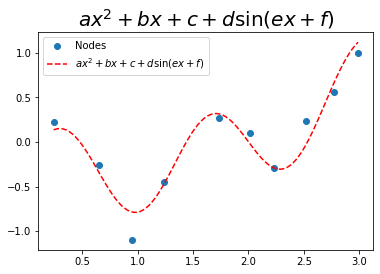

In [226]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import *

#节点及函数值
x=np.array([0.24,0.65,0.95,1.24,1.73,2.01,2.23,2.52,2.77,2.99])
xnew=np.linspace(np.amin(x),np.amax(x),100)
f=np.array([0.23,-0.26,-1.10,-0.45,0.27,0.10,-0.29,0.24,0.56,1.00])

#拟合函数-二次多项式与正弦函数之和
def func(x,a,b,c,d,e,f):
    return a*x**2+b*x+c+d*np.sin(e*x+f)

#最小二乘拟合
popt,pcov=curve_fit(func,x,f)
ffit=func(xnew,popt[0],popt[1],popt[2],popt[3],popt[4],popt[5])
print('a的值为',popt[0],'\nb的值为',popt[1],'\nc的值为',popt[2],'\nd的值为',popt[3],'\ne的值为',popt[4],'\nf的值为',popt[5])

#绘图
plt.title('$ax^2+bx+c+d\sin(ex+f)$',size=20)
plt.plot(x,f,'o',label='Nodes')
plt.plot(xnew,ffit,'r--',label='$ax^2+bx+c+d\sin(ex+f)$')
plt.legend()
plt.show

#### 3.&emsp;给定如下数据，求形如$ae^{bx}$的拟合函数

|$x_i$|1.00|1.25|1.50|1.75|2.00|
|:-:|:-:|:-:|:-:|:-:|:-:|
|$f(x_i)$|5.10|5.79|6.53|7.45|8.46|

a的值为 3.0665759303549063 
b的值为 0.5069548152698736


<function matplotlib.pyplot.show(*args, **kw)>

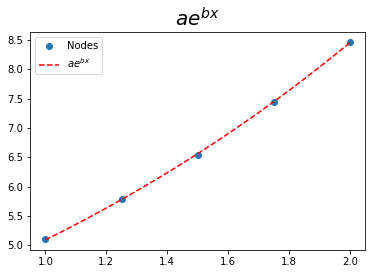

In [227]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import *

#节点及函数值
x=np.linspace(1,2,5)
xnew=np.linspace(np.amin(x),np.amax(x),100)
f=np.array([5.10,5.79,6.53,7.45,8.46])

#拟合函数-指数函数
def func(x,a,b):
    return a*np.exp(b*x)

#最小二乘拟合
popt,pcov=curve_fit(func,x,f)
ffit=func(xnew,popt[0],popt[1])
print('a的值为',popt[0],'\nb的值为',popt[1])

#绘图
plt.title('$ae^{bx}$',size=20)
plt.plot(x,f,'o',label='Nodes')
plt.plot(xnew,ffit,'r--',label='$ae^{bx}$')
plt.legend()
plt.show

#### 4.&emsp;用$y=a\sin bx$拟合数据

|$x$|0.1|0.2|0.3|0.4|0.5|0.6|0.7|0.8|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|$y$|0.6|1.1|1.6|1.8|2.0|1.9|1.7|1.3|

a的值为 1.9750410315945646 
b的值为 3.0249462932432114


<function matplotlib.pyplot.show(*args, **kw)>

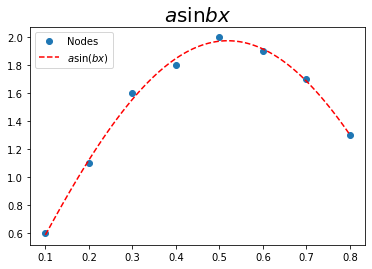

In [228]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import *

#节点及函数值
x=np.linspace(0.1,0.8,8)
xnew=np.linspace(np.amin(x),np.amax(x),100)
f=np.array([0.6,1.1,1.6,1.8,2.0,1.9,1.7,1.3])

#拟合函数-正弦函数
def func(x,a,b):
    return a*np.sin(b*x)

#最小二乘拟合
popt,pcov=curve_fit(func,x,f)
ffit=func(xnew,popt[0],popt[1])
print('a的值为',popt[0],'\nb的值为',popt[1])

#绘图
plt.title('$a\sin bx$',size=20)
plt.plot(x,f,'o',label='Nodes')
plt.plot(xnew,ffit,'r--',label='$a\sin(bx)$')
plt.legend()
plt.show

## 练习
#### 1.&emsp;观测物体的直线运动，得到如下数据，求运动方程

|&ensp;时间$t(s)$&ensp;|0|0.9|1.9|3.0|3.9|5.0|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|距离$S(m)$|0|10|30|50|80|110|

运动方程为(时间：x/s)：
        2
2.249 x + 11.08 x - 0.5834


<function matplotlib.pyplot.show(*args, **kw)>

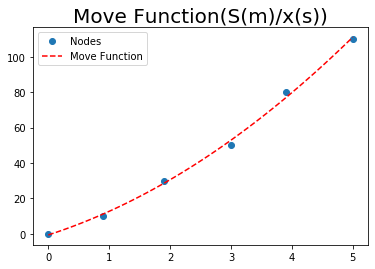

In [232]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import *

#节点及函数值
x=np.array([0,0.9,1.9,3.0,3.9,5.0])
xnew=np.linspace(np.amin(x),np.amax(x),100)
f=np.array([0,10,30,50,80,110])

#拟合函数-运动方程（二次多项式）
def func(x,a,b,c):
    return a*x**2+b*x+c

#最小二乘拟合
popt,pcov=curve_fit(func,x,f)
ffit=func(xnew,popt[0],popt[1],popt[2])
p=np.poly1d([popt[0],popt[1],popt[2]])
print('运动方程为(时间：x/s)：\n',p)

#绘图
plt.title('Move Function(S(m)/x(s))',size=20)
plt.plot(x,f,'o',label='Nodes')
plt.plot(xnew,ffit,'r--',label='Move Function')
plt.legend()
plt.show

#### 2.&emsp;求拟合下列数据的线性最小二乘多项式解

|$x$|0|0.2|0.4|0.6|0.8|1.0|1.2|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|$y$|0.9|1.9|2.8|3.3|4.0|5.7|6.5|

线性一次多项式为
  
4.571 x + 0.8429


<function matplotlib.pyplot.show(*args, **kw)>

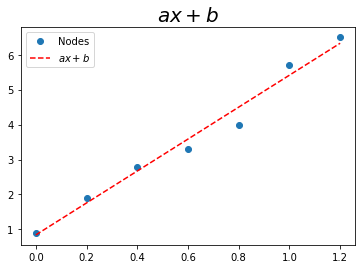

In [233]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import *

#节点及函数值
x=np.linspace(0,1.2,7)
xnew=np.linspace(np.amin(x),np.amax(x),100)
f=np.array([0.9,1.9,2.8,3.3,4.0,5.7,6.5])

#拟合函数-线性一次多项式
def func(x,a,b):
    return a*x+b

#最小二乘拟合
popt,pcov=curve_fit(func,x,f)
ffit=func(xnew,popt[0],popt[1])
p=np.poly1d([popt[0],popt[1]])
print('线性一次多项式为\n',p)

#绘图
plt.title('$ax+b$',size=20)
plt.plot(x,f,'o',label='Nodes')
plt.plot(xnew,ffit,'r--',label='$ax+b$')
plt.legend()
plt.show

#### 3.&emsp;试用最小二乘法求形如$y=ae^{bx}$的经验公式，使它与下列数据相拟合

|$x_i$|1|2|3|4|5|6|7|8|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|$y_i$|15.3|20.5|27.4|36.6|49.1|65.6|87.8|117.6|

a的值为 11.424091607172363 
b的值为 0.29140735949524815


<function matplotlib.pyplot.show(*args, **kw)>

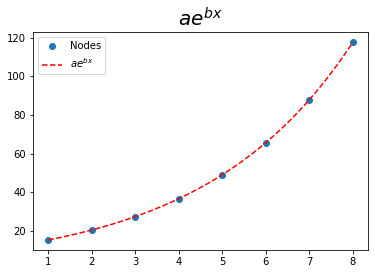

In [234]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import *

#节点及函数值
x=np.linspace(1,8,8)
xnew=np.linspace(np.amin(x),np.amax(x),100)
f=np.array([15.3,20.5,27.4,36.6,49.1,65.6,87.8,117.6])

#拟合函数-指数函数
def func(x,a,b):
    return a*np.exp(b*x)

#最小二乘拟合
popt,pcov=curve_fit(func,x,f)
ffit=func(xnew,popt[0],popt[1])
print('a的值为',popt[0],'\nb的值为',popt[1])

#绘图
plt.title('$ae^{bx}$',size=20)
plt.plot(x,f,'o',label='Nodes')
plt.plot(xnew,ffit,'r--',label='$ae^{bx}$')
plt.legend()
plt.show

#### 4.&emsp;已知实验数据如下，用最小二乘法求形如$y=a+bx^2$的经验公式

|$x_i$|10|25|31|38|44|
|:-:|:-:|:-:|:-:|:-:|:-:|
|$y_i$|19.0|32.5|49.0|73.3|97.8|

a的值为 9.627054826408688 
b的值为 0.044110684140838186


<function matplotlib.pyplot.show(*args, **kw)>

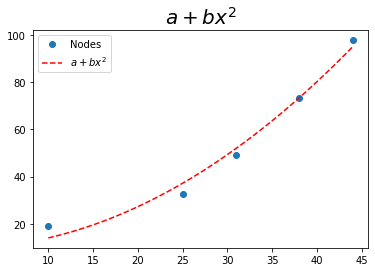

In [235]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import *

#节点及函数值
x=np.array([10,25,31,38,44])
xnew=np.linspace(np.amin(x),np.amax(x),100)
f=np.array([19.0,32.5,49.0,73.3,97.8])

#拟合函数-无一次项的二次多项式
def func(x,a,b):
    return a+b*x**2

#最小二乘拟合
popt,pcov=curve_fit(func,x,f)
ffit=func(xnew,popt[0],popt[1])
print('a的值为',popt[0],'\nb的值为',popt[1])

#绘图
plt.title('$a+bx^2$',size=20)
plt.plot(x,f,'o',label='Nodes')
plt.plot(xnew,ffit,'r--',label='$a+bx^2$')
plt.legend()
plt.show

## 作业
#### **1.&emsp;预测人口**
实验目的：最小二乘法<br/>
实验内容：（1）编写程序分别用公式$y=ax+b,y=ae^{bx}$拟合下列数据并计算2020年的人口数；<br/>
（2）分析说明哪种模型更适合拟合这些数据

|年份|1980|1985|1990|1995|2000|2005|2010|2015|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|人口|9.87|10.59|11.43|12.11|12.67|13.08|13.30|13.60|

（1）
一次多项式为：
  
0.1075 x - 202.7
一次多项式的2020年人口预测值为： 14.501071424194947


指数函数的系数为:
a= 3.234732494335676e-07 b= 0.008726369060288352
指数函数的2020年人口预测值为： 14.63061255979811

（2）
一次多项式拟合的误差为： 0.529672619047618
指数函数拟合的误差为： 0.7699358608230291
比较两种方法误差大小可知，一次多项式ax+b更适合拟合这些数据


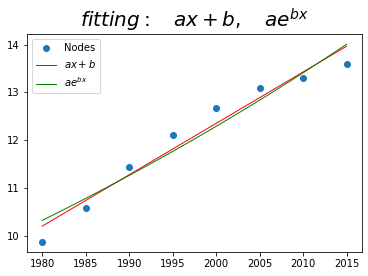

In [237]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import *

print('（1）')
#节点及函数值
x=np.linspace(1980,2015,8)
xnew=np.linspace(np.amin(x),np.amax(x),100)
f=np.array([9.87,10.59,11.43,12.11,12.67,13.08,13.30,13.60])

#一次多项式最小二乘拟合
def func(x,a,b):
    return a*x+b
popt,pcov=curve_fit(func,x,f)
ffit1=func(xnew,popt[0],popt[1])
poly=np.poly1d([popt[0],popt[1]])
print('一次多项式为：\n',poly)
print('一次多项式的2020年人口预测值为：',func(2020,popt[0],popt[1]))
print('\n')

#指数函数最小二乘拟合
def error(p,x,y):
    return p[0]*np.exp(p[1]*x)-y
p0=[1.5,0]
ret=leastsq(error,p0,args=(x,f))
a,b=ret[0]
ffit2=a*np.exp(b*xnew)
print('指数函数的系数为:\na=',a,'b=',b)
print('指数函数的2020年人口预测值为：',a*np.exp(b*2020))

#绘图
plt.title('$fitting:\quad ax+b,\quad ae^{bx}$',size=20)
plt.plot(x,f,'o',label='Nodes')
plt.plot(xnew,ffit1,'r',label='$ax+b$',linewidth=1)
plt.plot(xnew,ffit2,'g',label='$ae^{bx}$',linewidth=1)
plt.legend()
plt.show

print('\n（2）')
#分别计算两种拟合函数的误差
error1=0
error2=0
for i in range(8):
    error1=error1+(func(x[i],popt[0],popt[1])-f[i])**2
    error2=error2+(a*np.exp(b*x[i])-f[i])**2
print('一次多项式拟合的误差为：',error1)
print('指数函数拟合的误差为：',error2)
print('比较两种方法误差大小可知，一次多项式ax+b更适合拟合这些数据')

#### **2.&emsp;函数逼近中的病态问题**
实验目的：函数逼近中的病态问题<br/>
实验内容：考虑区间$\left[0,1\right]$上定义函数$f(x)$的最小二乘拟合多项式，将该区间等分，计算利用等分节点以及节点处函数值生成$3$次，$5$次，$10$次，$15$次拟合多项式时，法方程系数矩阵的条件数。

In [180]:
import numpy as np

#多项式法方程生成函数
def noramlequ(x,degree):
    n=np.size(x)
    equ=np.zeros((degree+1,degree+1))
    for i in range(degree+1):
        for j in range(degree+1):
            for k in range(n):
                equ[i,j]=equ[i,j]+(x[k]**i)*(x[k]**j)
    return equ

#生成[0,1]上10等分节点
x=np.linspace(0,1,10)

#分别计算3次、5次、10次、15次拟合多项式时法方程矩阵条件数
c3=np.linalg.cond(noramlequ(x,3))
c5=np.linalg.cond(noramlequ(x,5))
c10=np.linalg.cond(noramlequ(x,10))
c15=np.linalg.cond(noramlequ(x,15))

#打印结果
print('将[0,1]区间10等分：')
print('3次拟合多项式法方程系数矩阵的条件数为：',c3)
print('5次拟合多项式法方程系数矩阵的条件数为：',c5)
print('10次拟合多项式法方程系数矩阵的条件数为：',c10)
print('15次拟合多项式法方程系数矩阵的条件数为：',c15)

将[0,1]区间10等分：
3次拟合多项式法方程系数矩阵的条件数为： 9806.152355551512
5次拟合多项式法方程系数矩阵的条件数为： 10046323.04545725
10次拟合多项式法方程系数矩阵的条件数为： 2.5890702513230234e+18
15次拟合多项式法方程系数矩阵的条件数为： 2.476524249687018e+18


#### **3.&emsp;插值与函数逼近的比**
实验目的：曲线的拟合和插值，是逼近函数的基本方法，每种方法具有各自的特点和特定的适用范围，实际工作中合理选择方法是重要的。<br/>
实验内容：（1）对于龙格函数，对比该函数的二次和三次拟合多项式，与拉格朗日插值多项式以及样条插值的结果；<br/>
（2）分析讨论在何种情况下，插值多项式与最小二乘拟合多项式是相同的。

（1）
根据对龙格函数的拟合结果，结论是样条插值拟合得最好，拉格朗日插值在中间的拟合结果尚可但两头浮动过大，多项式拟合很差


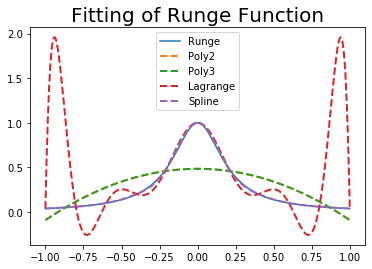

In [49]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import *
from scipy.interpolate import lagrange
from scipy.interpolate import CubicSpline

print('（1）')
#取龙格函数1/(1+25x^2)
x=np.linspace(-1,1,11)
xnew=np.linspace(-1,1,500)
f=1/(1+25*x**2)
fnew=1/(1+25*xnew**2)

#二次多项式最小二乘拟合
def func_P2(x,a,b,c):
    return a*x**2+b*x+c
popt_P2,pcov_P2=curve_fit(func_P2,x,f)
ffit_P2=func_P2(xnew,popt_P2[0],popt_P2[1],popt_P2[2])

#三次多项式最小二乘拟合
def func_P3(x,a,b,c,d):
    return a*x**3+b*x**2+c*x+d
popt_P3,pcov_P3=curve_fit(func_P3,x,f)
ffit_P3=func_P3(xnew,popt_P3[0],popt_P3[1],popt_P3[2],popt_P3[3])

#拉格朗日插值
p_L=lagrange(x,f)
ffit_L=p_L(xnew)

#三次样条插值
cs=CubicSpline(x,f,bc_type='natural')
ffit_S=cs(xnew)

#绘图
plt.title('Fitting of Runge Function',size=20)
plt.plot(xnew,fnew,'-',label='Runge',linewidth=1.5)
plt.plot(xnew,ffit_P2,'--',label='Poly2',linewidth=2)
plt.plot(xnew,ffit_P3,'--',label='Poly3',linewidth=2)
plt.plot(xnew,ffit_L,'--',label='Lagrange',linewidth=2)
plt.plot(xnew,ffit_S,'--',label='Spline',linewidth=2)
plt.legend()
plt.show

#结果对比
print('根据对龙格函数的拟合结果，结论是样条插值拟合得最好，拉格朗日插值在中间的拟合结果尚可但两头浮动过大，多项式拟合很差')

（2）
**当节点数为n时，最小二乘法使用n-1次多项式拟合所得的结果与插值多项式拟合结果相同**


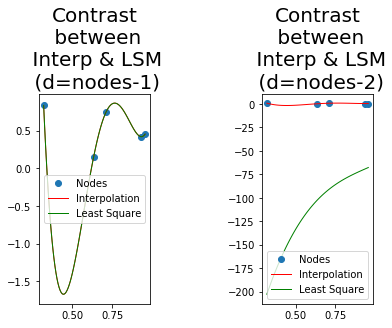

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import *
from scipy.interpolate import lagrange
print('（2）')

#生成随机节点
x=np.random.rand(5)
f=np.random.rand(5)
xnew=np.linspace(np.amin(x),np.amax(x),100)

#插值多项式
p1=lagrange(x,f)
ffit1=p1(xnew)

#二次多项式最小二乘拟合：次数为节点数-1
def func(x,a,b,c,d,e):
    return a*x**4+b*x**3+c*x**2+d*x+e
popt,pcov=curve_fit(func,x,f)
ffit2=func(xnew,popt[0],popt[1],popt[2],popt[3],popt[4])

#二次多项式最小二乘拟合：次数为节点数-2
def func2(x,a,b,c,d):
    return a*x**3+b*x**2+c*x+d
popt2,pcov2=curve_fit(func2,x,f)
ffit3=func2(xnew,popt[0],popt[1],popt[2],popt[3])

#绘图
plt.subplots_adjust(left=None, bottom=0.15, right=None, top=None, wspace=1, hspace=0.15)
plt.subplot(121)
plt.title('Contrast\n between\n Interp & LSM\n (d=nodes-1)',size=20)
plt.plot(x,f,'o',label='Nodes')
plt.plot(xnew,ffit1,'r',label='Interpolation',linewidth=1)
plt.plot(xnew,ffit2,'g',label='Least Square',linewidth=1)
plt.legend()
plt.show

plt.subplot(122)
plt.title('Contrast\n between\n Interp & LSM\n (d=nodes-2)',size=20)
plt.plot(x,f,'o',label='Nodes')
plt.plot(xnew,ffit1,'r',label='Interpolation',linewidth=1)
plt.plot(xnew,ffit3,'g',label='Least Square',linewidth=1)
plt.legend()
plt.show

#结果分析
print('当节点数为n时，最小二乘法使用n-1次多项式拟合所得的结果与插值多项式拟合结果相同')